[![View notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/Jensen_and_Nugent_2017/Fig_1.ipynb) 
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/PySDM_examples/Jensen_and_Nugent_2017/Fig_1.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Jensen_and_Nugent_2017/Fig_1.ipynb)

#### based on Fig. 1 from [Jensen and Nugent (JAS 74)  "_Condensational Growth of Drops Formed on Giant Sea-Salt Aerosol Particles_"](https://doi.org/10.1175/JAS-D-15-0370.1)

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install "open-atmos-jupyter-utils"
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples>=2.45')

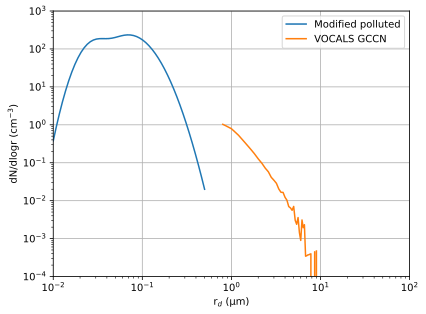

HTML(value="<a href='./fig_1.pdf' target='_blank'>./fig_1.pdf</a><br>")

In [3]:
import numpy as np
from matplotlib import pyplot
from open_atmos_jupyter_utils import show_plot
from PySDM.physics import in_unit, si
from PySDM_examples.Jensen_and_Nugent_2017 import Settings, table_3
settings = Settings(aerosol="modified polluted", cloud_type="Sc")
trivia = settings.formulae.trivia

TABLE3_DR = table_3.RD[1] - table_3.RD[0]
np.testing.assert_almost_equal(np.diff(table_3.RD), TABLE3_DR)

X_UNIT = si.um
Y_UNIT = si.cm**-3

rd = np.logspace(
    np.log10(.01 * si.um),
    np.log10(.5 * si.um)
)
pdf = settings.dry_radii_spectrum.size_distribution(rd)
dN_dlogr = trivia.dn_dlogr(rd, pdf)

pyplot.loglog(
    in_unit(rd, X_UNIT),
    in_unit(dN_dlogr, Y_UNIT),
    label='Modified polluted'
)
pyplot.loglog(
    in_unit(table_3.RD, X_UNIT),
    in_unit(trivia.dn_dlogr(table_3.RD, table_3.NA / TABLE3_DR), Y_UNIT),
    label='VOCALS GCCN'
)
pyplot.legend()
pyplot.xlabel("r$_d$ (µm)")
pyplot.xlim(
    in_unit(rd[0], si.um),
    in_unit(100 * si.um, si.um)
)
pyplot.ylabel("dN/dlogr (cm$^{-3}$)")
pyplot.ylim(1e-4, 1e3)
pyplot.grid()
show_plot('fig_1.pdf')